<a href="https://colab.research.google.com/github/Kalpesh1969/EDA-Project/blob/main/Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Data Analysis on Hotel Reservation Dataset



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Kalpesh Parikh
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

We have been given a dataset which contains information about hotel industry. This dataset has data about customer's hotel reservation which contains some basic information like hotel name, arrival date, lead time, no of guest, week-end/week-days stay, customer's country, distribution channel and agent tyep.

Our goal is to perform analysis whether there is a high cancellation done by customer and what could be impacted attributes which is contributing to the higher cancellation rate.

First we have checked overall cancellation percentage on entire data which is 27%, this seems to be very high rate of cancellation and can have high impact on company's revenue.

At second level we have perforned analysis at different attributes level like
    Hotel wise cancellation
    Market Segment wise cancellation
    Distribution Channel wise cancellation
    Customer Type wise cancellation
    Country wise cancellation
    Arrival Month wise cancellation

Our findings on these attributes is explained below in the various chart.

At third level we have perforned analysis with respect to ADR-Average Daily Revenue because hotel's room tarif can have high relation with cancellation.

As a summary we have observed that city hotel has high cancellation rate. Customer those have booked thru online TA channel have higher cancellation and specially in Jul and August month. We have observed higher ADR during these month which can be because of vacation period. Other observation is that high ADR is seen for PRT-Porgual country which requires special attention for this country's booking.

# **GitHub Link -**

https://colab.research.google.com/drive/12jFGknXJWrhqGiCcJFKX-QtYiLH7kO-M?usp=sharing

# **Problem Statement**


**We need to perform various fact finding and analysis on why booking is cancelled because cancellation can lead to direct revenue lose to an organization**

#### **Define Your Business Objective?**

We have to perform data analysis at different level and need to narrow down analysis till we achieve and derive some meaningfu insight on reason for booking cancellation

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!pip install xlrd

### Dataset Loading

In [4]:
# Load
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DataSet/Hotel Bookings.xlsx')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

In [7]:
# Dataset Info
# Company column has many null values, which indicates corporate booking are less as compare to individual booking
# Majority booking happns thru agent as not null value is significantly high
# Country field also has some null values
# we can see that children, agent and company has float64 data types which should be an integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
# there are 31994 duplicate rows which needs to be dropped
len(df[df.duplicated()])

31994

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
# country, agent and company fields have null values
null_value = df.isnull()
null_value

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0       False        False      False              False               False   
1       False        False      False              False               False   
2       False        False      False              False               False   
3       False        False      False              False               False   
4       False        False      False              False               False   
...       ...          ...        ...                ...                 ...   
119385  False        False      False              False               False   
119386  False        False      False              False               False   
119387  False        False      False              False               False   
119388  False        False      False              False               False   
119389  False        False      False              False               False   

        arrival_date_week_number  arrival_date_day_of_month  \
0                          False                      False   
1                          False                      False   
2                          False                      False   
3                          False                      False   
4                          False                      False   
...                          ...                        ...   
119385                     False                      False   
119386                     False                      False   
119387                     False                      False   
119388                     False                      False   
119389                     False                      False   

        stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                         False                 False   False  ...   
1                         False                 False   False  ...   
2                         False                 False   False  ...   
3                         False                 False   False  ...   
4                         False                 False   False  ...   
...                         ...                   ...     ...  ...   
119385                    False                 False   False  ...   
119386                    False                 False   False  ...   
119387                    False                 False   False  ...   
119388                    False                 False   False  ...   
119389                    False                 False   False  ...   

        deposit_type  agent  company  days_in_waiting_list  customer_type  \
0              False   True     True                 False          False   
1              False   True     True                 False          False   
2              False   True     True                 False          False   
3              False  False     True                 False          False   
4              False  False     True                 False          False   
...              ...    ...      ...                   ...            ...   
119385         False  False     True                 False          False   
119386         False  False     True                 False          False   
119387         False  False     True                 False          False   
119388         False  False     True                 False          False   
119389         False  False     True                 False          False   

          adr  required_car_parking_spaces  total_of_special_requests  \
0       False                        False                      False   
1       False                        False                      False   
2       False                        False                      False   
3       False                        False                      False   
4       False                        False                      False   
...       ...                          ...                        ...   
119385  False

In [13]:
# Missing values in descending order of null value counts
miss_values = df.isnull().sum().sort_values(ascending=False)
miss_values

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_nights                   0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_week_number               0
arrival_date_month                     0
arrival_date_year                      0
lead_time                              0
reservation_status_date                0
dtype: int64

<Axes: >

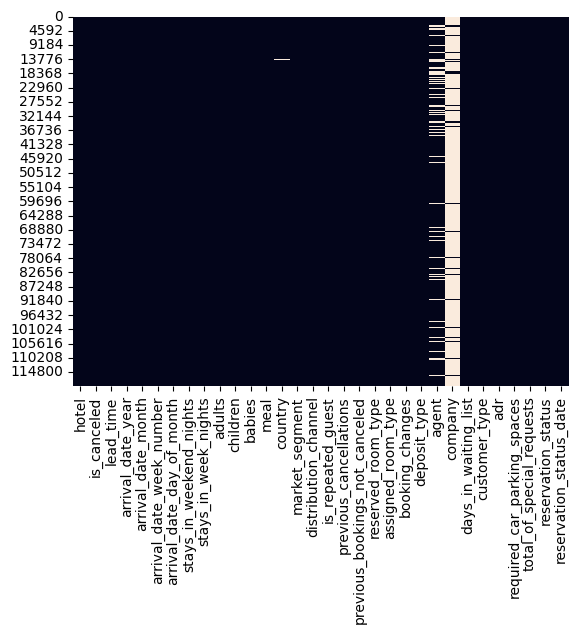

In [14]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

Given dataset is for Hotel booking from Hotel Industry. It has an information about customer hotel room reservation for two hotels City and Resort Hotels. It contains information such as when booking was made, whether its week-end or week-days, length of stay, which types of guests adult, children, babies. Whether parking space was requested or not etc.We need to analyse data specially on canellation. Try to find out the reason for cancellation and which is the most affecting parameter for calcellation.

Above dataset has 119390 rows and 32 columns. Null values are observed for Company, Agent, Country and Children. Dataset contains 31944 duplicate rows.

**Duplicate Values** - There are 31994 duplicate values which needs to be deleted

**Company Null** - Company filed has the highest null value of 112593 rows which needs to be deleted or entire column to be dropped

**agent Null** - Agent field has 16340 null value which needs to be replaced

**Country Null** - Country field has 488 null value which needs to be replced

**Children Null** - Children field has 4 null value which needs to be replced


## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [16]:
# Dataset Describe
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   
std         0.482918     106.863097           0.707476   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   
std                   13.605138                   8.780829   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   
std                   0.998613              1.908286       0.579261   

            children         babies  ...  previous_cancellations  \
count  119386.000000  119390.000000  ...           119390.000000   
mean        0.103890       0.007949  ...                0.087118   
min         0.000000       0.000000  ...                0.000000   
25%         0.000000       0.000000  ...                0.000000   
50%         0.000000       0.000000  ...                0.000000   
75%         0.000000       0.000000  ...                0.000000   
max        10.000000      10.000000  ...               26.000000   
std         0.398561       0.097436  ...                0.844336   

       previous_bookings_not_canceled  booking_changes          agent  \
count                   119390.000000    119390.000000  103050.000000   
mean                         0.137097         0.221124      86.693382   
min                          0.000000         0.000000       1.000000   
25%                          0.000000         0.000000       9.000000   
50%                          0.000000         0.000000      14.000000   
75%                          0.000000         0.000000     229.000000   
max                         72.000000        21.000000     535.000000   
std                          1.497437         0.652306     110.774548   

           company  days_in_waiting_list            adr  \
count  6797.000000         119390.000000  119390.000000   
mean    189.266735              2.321149     101.831122   
min       6.000000              0.000000      -6.380000   
25%      62.000000              0.000000      69.290000   
50%     179.000000              0.000000      94.575000   
75%     270.000000              0.000000     126.000000   
max     543.000000            391.000000    5400.000000   
std     131.655015             17.594721      50.535790   

       required_car_parking_spaces  total_of_special_requests  \
count                119390.000000              119390.000000   
mean                      0.062518                   0.571363   
min                       0.000000                   0.000000   
25%                       0.000000                   0.000000   
50%                       0.000000                   0.000000   
75%                       0.000000                   1.000000   
max                       8.0

### Variables Description

* **hotel                :**Hotel name(Resort or City)
* **is_canceled          :**Flag whether booking cancelled or not 1-Cancelled
* **lead_time            :**cycle time from booking to check-in
* **arrival_date_year    :**Year of arrival date
* **arrival_date_month   :**Month of arrival date
* **arrival_date_week_number    :**week number of year for arrival date
* **arrival_date_day_of_month    :**Day of arrival date
* **stays_in_weekend_nights    :**No. of nights stayed in week-end
* **stays_in_week_nights    :**No. of nights stayed during week-days
* **adults    :**No. of adults guests
* **children    :**No. of children guests
* **babies    :**No. of babies guests
* **meal    :**Types of meal BB(Bread & Butter), HB(Half Bread), FB(Full Board), SC(Self-Catering)
* **country    :**Country code which country of the guests
* **market_segment    :**Types of market segment such as Direct, Corporate, Aviation, Complementary, Groups, Offline TA/TO, Online TA, Undefined
* **distribution_channel    :**Types of distribution channel such as Corporate, Direct, GDS, TA/TO, Undefined
* **is_repeated_guest    :**Flag whether its repeated guest or not 1-Repeated
* **previous_cancellations    :**No. of previous booking cancelled by the guests prior to  current booking
* **previous_bookings_not_canceled    :**No. of previous booking not canelled by the guests prior to current booking
* **reserved_room_type    :**Reserved room type A,B,C,D,E,F,G,H,L,P
* **assigned_room_type    :**Assigned room type A,B,C,D,E,F,G,H,I,K,L,P
* **booking_changes    :**No. of type booking changes/amendment done
* **deposit_type    :**Types of deposit No Deposit, Non Refundable, Refundable
* **agent    :**Agent code - different code given to different agent for booking
* **company    :**Company code - In case of corporate customer code given to different company
* **days_in_waiting_list    :**No. of days booking was in the waiting list
* **customer_type    :**Type of customer - Contract, Group, Transient, Transient-party
* **adr    :**Average Daily Rate (Average daily revenue)
* **required_car_parking_spaces    :**No. of car parking space required by customer
* **total_of_special_requests    :**No. of special request made by guests
* **reservation_status    :**Type of reservation status - Check-out, Cancelled, No-Show
* **reservation_status_date    :**Last date of reservation status updated


### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

In [18]:
print(df.apply(lambda col: col.unique()))

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
# Create a copy of the current dataset and assigning to df
dt=df.copy()

In [20]:
# Remove duplicate rows
dt.drop_duplicates(inplace=True)

In [21]:
# number of unique rows after removal of duplicate rows
uniq_rows = dt.shape[0]
uniq_rows

87396

In [22]:
dt.reset_index()

index         hotel  is_canceled  lead_time  arrival_date_year  \
0           0  Resort Hotel            0        342               2015   
1           1  Resort Hotel            0        737               2015   
2           2  Resort Hotel            0          7               2015   
3           3  Resort Hotel            0         13               2015   
4           4  Resort Hotel            0         14               2015   
...       ...           ...          ...        ...                ...   
87391  119385    City Hotel            0         23               2017   
87392  119386    City Hotel            0        102               2017   
87393  119387    City Hotel            0         34               2017   
87394  119388    City Hotel            0        109               2017   
87395  119389    City Hotel            0        205               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   July                        27                          1   
1                   July                        27                          1   
2                   July                        27                          1   
3                   July                        27                          1   
4                   July                        27                          1   
...                  ...                       ...                        ...   
87391             August                        35                         30   
87392             August                        35                         31   
87393             August                        35                         31   
87394             August                        35                         31   
87395             August                        35                         29   

       stays_in_weekend_nights  stays_in_week_nights  ...  deposit_type  \
0                            0                     0  ...    No Deposit   
1                            0                     0  ...    No Deposit   
2                            0                     1  ...    No Deposit   
3                            0                     1  ...    No Deposit   
4                            0                     2  ...    No Deposit   
...                        ...                   ...  ...           ...   
87391                        2                     5  ...    No Deposit   
87392                        2                     5  ...    No Deposit   
87393                        2                     5  ...    No Deposit   
87394                        2                     5  ...    No Deposit   
87395                        2                     7  ...    No Deposit   

       agent  company days_in_waiting_list customer_type     adr  \
0        NaN      NaN                    0     Transient    0.00   
1        NaN      NaN                    0     Transient    0.00   
2        NaN      NaN                    0     Transient   75.00   
3      304.0      NaN                    0     Transient   75.00   
4      240.0      NaN                    0     Transient   98.00   
...      ...      ...                  ...           ...     ...   
87391  394.0      NaN                    0     Transient   96.14   
87392    9.0      NaN                    0     Transient  225.43   
87393    9.0      NaN                    0     Transient  157.71   
87394   89.0      NaN                    0     Transient  104.40   
87395    9.0      NaN                    0     Transient  151.20   

      required_car_parking_spaces  total_of_special_requests  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          1   
...                           ...           

In [23]:
# Null Values Count
# country, agent and company fields have null values
null_value = dt.isnull()
null_value

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0       False        False      False              False               False   
1       False        False      False              False               False   
2       False        False      False              False               False   
3       False        False      False              False               False   
4       False        False      False              False               False   
...       ...          ...        ...                ...                 ...   
119385  False        False      False              False               False   
119386  False        False      False              False               False   
119387  False        False      False              False               False   
119388  False        False      False              False               False   
119389  False        False      False              False               False   

        arrival_date_week_number  arrival_date_day_of_month  \
0                          False                      False   
1                          False                      False   
2                          False                      False   
3                          False                      False   
4                          False                      False   
...                          ...                        ...   
119385                     False                      False   
119386                     False                      False   
119387                     False                      False   
119388                     False                      False   
119389                     False                      False   

        stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                         False                 False   False  ...   
1                         False                 False   False  ...   
2                         False                 False   False  ...   
3                         False                 False   False  ...   
4                         False                 False   False  ...   
...                         ...                   ...     ...  ...   
119385                    False                 False   False  ...   
119386                    False                 False   False  ...   
119387                    False                 False   False  ...   
119388                    False                 False   False  ...   
119389                    False                 False   False  ...   

        deposit_type  agent  company  days_in_waiting_list  customer_type  \
0              False   True     True                 False          False   
1              False   True     True                 False          False   
2              False   True     True                 False          False   
3              False  False     True                 False          False   
4              False  False     True                 False          False   
...              ...    ...      ...                   ...            ...   
119385         False  False     True                 False          False   
119386         False  False     True                 False          False   
119387         False  False     True                 False          False   
119388         False  False     True                 False          False   
119389         False  False     True                 False          False   

          adr  required_car_parking_spaces  total_of_special_requests  \
0       False                        False                      False   
1       False                        False                      False   
2       False                        False                      False   
3       False                        False                      False   
4       False                        False                      False   
...       ...                          ...                        ...   
119385  False

In [24]:
# Missing values count and order then in descending order
miss_values = dt.isnull().sum().sort_values(ascending=False)
miss_values

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0
stays_in_weekend_nights               0
arrival_date_day_of_month             0
arrival_date_week_number              0
arrival_date_month                    0
arrival_date_year                     0
lead_time                             0
reservation_status_date               0
dtype: int64

In [26]:
# Missing/null value in % for column company with respect to total unique rows. here index 0 mean it will take first elements which is company
Percent_company_null = (miss_values[0]/uniq_rows)*100
Percent_company_null

<ipython-input-26-a8d3f8e9ac89>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Percent_company_null = (miss_values[0]/uniq_rows)*100


93.98256213098998

In [27]:
# Missing/null value in % for column agent with respect to total unique rows. here index 1 mean it will take second elements which is agent
Percent_agent_null = (miss_values[1]/uniq_rows)*100
Percent_agent_null

<ipython-input-27-8e62768fd6ef>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Percent_agent_null = (miss_values[1]/uniq_rows)*100


13.951439425145315

In [28]:
# Missing/null value in % for country with respect to total unique rows. here index 2 mean it will take third elements which is country
Percent_country_null = (miss_values[2]/uniq_rows)*100
Percent_country_null

<ipython-input-28-ab131e00e5a2>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Percent_country_null = (miss_values[2]/uniq_rows)*100


0.5171861412421621

In [29]:
# Missing/null value in % for column children with respect to total unique rows. here index 3 mean it will take fourth elements which is children
Percent_children_null = (miss_values[3]/uniq_rows)*100
Percent_children_null

<ipython-input-29-d8bab2365ee6>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Percent_children_null = (miss_values[3]/uniq_rows)*100


0.004576868506567806

***(1) Company*** column contains very high 93% missing/null values which is not recommended to do any kind of analysis on this column hence we are dropping this column

In [30]:
# Since company has very high 93% of missing/null values hence we are dropping of this column
dt.drop(['company'], axis=1, inplace=True)

In [31]:
dt.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

***(2) Agent*** column contains 13% missing/null values. As this column represents agent code as numeric value and there is no agent code assigned for these rows so we would replace it with zero

In [32]:
dt['agent'].fillna(value=0, inplace=True)

<ipython-input-32-113ee6e2f2c8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['agent'].fillna(value=0, inplace=True)


In [33]:
dt['agent'].isnull().sum()

0

***(3) Country*** column contains 0.5% missing/null values. As this column represents country code as alphabetic and there is no country code assigned for these rows so we would replace it with others

In [34]:
dt['country'].fillna(value='others', inplace=True)

<ipython-input-34-1418c568d352>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['country'].fillna(value='others', inplace=True)


In [35]:
dt['country'].isnull().sum()

0

***(4) Children*** column contains 0.004% missing/null values. As this column represents number of children guests in terms of count as numeric value and there is no count  assigned for these rows so we would replace it with zero

In [36]:
dt['children'].fillna(value=0, inplace=True)

<ipython-input-36-0e0d57b4d6c3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['children'].fillna(value=0, inplace=True)


In [37]:
dt['children'].isnull().sum()

0

After performing various data cleaning operations as mentioned below, now there should zero row which contains null/missing values

In [38]:
dt.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
dtype: int64

***(5) Type Change*** Children and agent column has float64 datatype while data stored in these column do not require float value, hence we are changing datatype of these columns as int64.

In [39]:
dt[['children', 'agent']] = dt[['children', 'agent']].astype('int64')
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  babies

### What all manipulations have you done and insights you found?

***(1) Duplicate rows*** There are 31994 duplicate rows found which is deleted

***(2) Company*** column contains very high 93% missing/null values which is not recommended to do any kind of analysis on this column hence we are dropping this column

***(3) Agent*** column contains 13% missing/null values. As this column represents agent code as numeric value and there is no agent code assigned for these rows so we would replace it with zero

***(4) Country*** column contains 0.5% missing/null values. As this column represents country code as alphabetic and there is no country code assigned for these rows so we would replace it with others

***(5) Children*** column contains 0.004% missing/null values. As this column represents number of children guests in terms of count as numeric value and there is no count  assigned for these rows so we would replace it with zero

***(6) Type Change*** Children and agent column has float64 datatype while data stored in these column do not require float value, hence we are changing datatype of these columns as int64.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Chart - 1 - Overall Status of Reservation vs Cancellation

In [40]:
# Chart - Overall Status of Reservation vs Cancellation
cancelled_per = dt['is_canceled'].value_counts()
print(cancelled_per)

is_canceled
0    63371
1    24025
Name: count, dtype: int64


In [41]:
cancelled_per = 100*dt['is_canceled'].value_counts(normalize = True)
print(cancelled_per)

is_canceled
0    72.510184
1    27.489816
Name: proportion, dtype: float64


<BarContainer object of 2 artists>

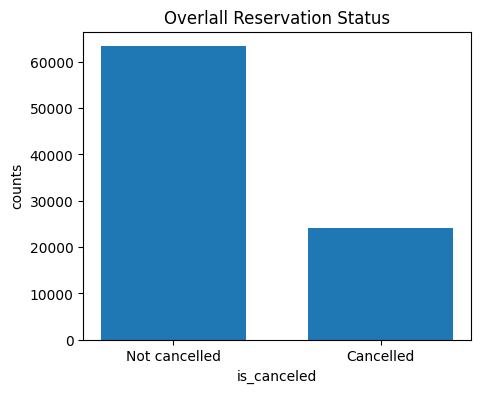

In [42]:
# Present this in the bar graph
plt.figure(figsize = (5,4))
plt.title('Overlall Reservation Status')
plt.xlabel('is_canceled') # defining title of x axis
plt.ylabel('counts') # defining title of y axis
plt.bar(['Not cancelled','Cancelled'],dt['is_canceled'].value_counts(), width=0.7)


In [43]:
print(dt.is_canceled.value_counts())
print(" ")

is_canceled
0    63371
1    24025
Name: count, dtype: int64
 


<Axes: ylabel='count'>

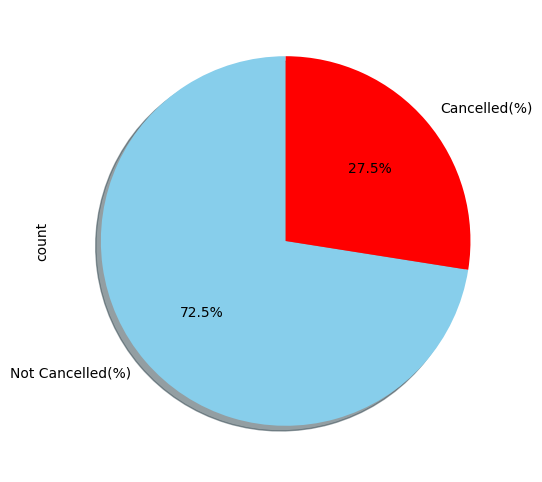

In [45]:
dt['is_canceled'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Cancelled(%)','Cancelled(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

##### 1. Why did you pick the specific chart?

Our main objective is to find some insight about reservation cancellation. As a first step we need to take overall look on the dataset that how many reservation are getting cancelled before going into the detail

##### 2. What is/are the insight(s) found from the chart?

There are total 87396 reservation data is there in the dataset after removal of duplicate. There are 24025 customer have cancelled their reservation due to any xyz reason. Here the cancellation percentage is 27% which is significantly high which requires further analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Overall cancellation percentage is 27% which is a serious concern and directly linked to company's revenue and its performance

## Chart - 2 - Hotel Wise Reservation Status

In [46]:
# Hotel wise reservation status
dt.groupby(['hotel','is_canceled']).agg({'is_canceled':'count'})

is_canceled
hotel        is_canceled             
City Hotel   0                  37379
             1                  16049
Resort Hotel 0                  25992
             1                   7976

In [48]:
resort_hotel = dt[dt['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.765191
1    0.234809
Name: proportion, dtype: float64

In [49]:
city_hotel = dt[dt['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.699614
1    0.300386
Name: proportion, dtype: float64

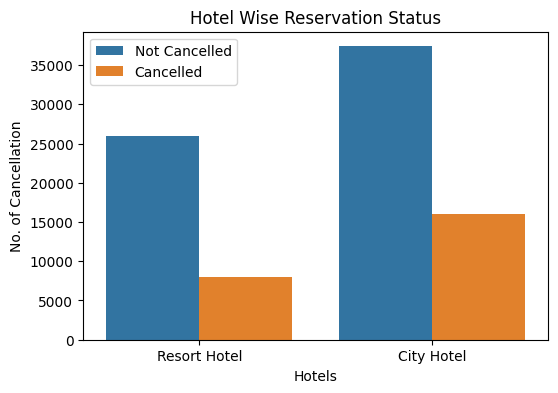

In [50]:
# Chart - 2 Hotel wise cancellation count
plt.figure(figsize = (6,4))
sns.countplot(x='hotel', hue='is_canceled', data=dt)
plt.title('Hotel Wise Reservation Status')
plt.xlabel('Hotels')
plt.ylabel('No. of Cancellation')
plt.legend(['Not Cancelled' , 'Cancelled'])


##### 1. Why did you pick the specific chart?

After getting overall picture of cancellation count, we need to do data analysis with regards to some specific information. As a next step we would like to know how many cancellatios are done for each hotels.

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is seen that city hotel as higher cancellation rate as compare to resort hotel. City hotel has 30% cancellation rate which is really very high

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

City hotel has higher cancellation rate which has direct impact on company's earning and reputation

## Chart - 3 Market Segment Wise Reservation Status

In [51]:
# Chart - 3 Market segment wise reservation status
dt.groupby(['market_segment','is_canceled']).agg({'is_canceled':'count'})

is_canceled
market_segment is_canceled             
Aviation       0                    182
               1                     45
Complementary  0                    614
               1                     88
Corporate      0                   3702
               1                    510
Direct         0                  10067
               1                   1737
Groups         0                   3607
               1                   1335
Offline TA/TO  0                  11826
               1                   2063
Online TA      0                  33373
               1                  18245
Undefined      1                      2

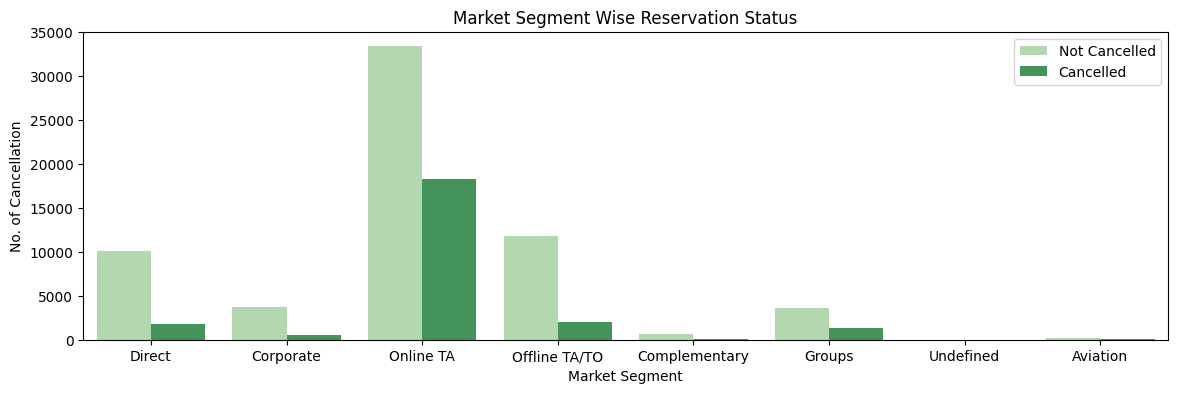

In [52]:
plt.figure(figsize = (14,4))
sns.countplot(x = 'market_segment', hue='is_canceled', data=dt, palette='Greens')
plt.title('Market Segment Wise Reservation Status')
plt.xlabel('Market Segment')
plt.ylabel('No. of Cancellation')
plt.legend(['Not Cancelled','Cancelled'])


##### 1. Why did you pick the specific chart?

After getting overall picture about cancellation, there is a need to do further dip diving and perform analysis with respect to other attributes. Market segment is one of the attribute which can be a cause of higher cancellation

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is clearly seen that Market Segment Online TA has the highest percentage of cancellation with regards to other Market Segment

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Market Segment Online TA has high cancellation which has an impact to company's revenue and performance. There is a need to do further analysis on customer service in terms of product pitch and other information while taking booking for this market segment

## Chart - 4 - Distribution Channel Wise Reservation Status

In [53]:
# Chart - 4 Distribution Channel Wise Reservation Status
dt.groupby(['distribution_channel','is_canceled']).agg({'is_canceled':'count'})

is_canceled
distribution_channel is_canceled             
Corporate            0                   4433
                     1                    648
Direct               0                  11063
                     1                   1925
GDS                  0                    145
                     1                     36
TA/TO                0                  47729
                     1                  21412
Undefined            0                      1
                     1                      4

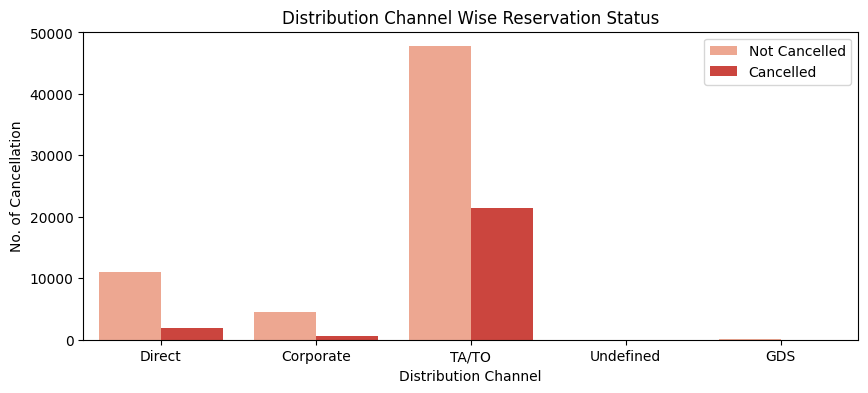

In [54]:
plt.figure(figsize=(10,4))
sns.countplot(x='distribution_channel', hue='is_canceled', data=dt, palette='Reds')
plt.title('Distribution Channel Wise Reservation Status')
plt.xlabel('Distribution Channel')
plt.ylabel('No. of Cancellation')
plt.legend(['Not Cancelled' , 'Cancelled'])

##### 1. Why did you pick the specific chart?

After getting overall picture about cancellation, there is a need to do further dip diving and perform analysis with respect to other attributes. Distribution Channel is one of the attribute which can be a cause of higher cancellation

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is clearly seen that Distribution Channel TA/TO has the highest percentage of cancellation as compared to other Distribution Channel

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Distribution Channel TA/TO has high cancellation which can have an impact to company's revenue and performance. There is a need to do further analysis on customer service in terms of product pitch and other information while taking booking by this distribution channel. TA/TO channel generally refers to Travel Agent/Tour Operator, they may be giving some wrong committment or false information for customer acquisiion to meet the target. There is a need to focus on quality acquisition

## Chart - 5 - Agent Wise Reservation Status

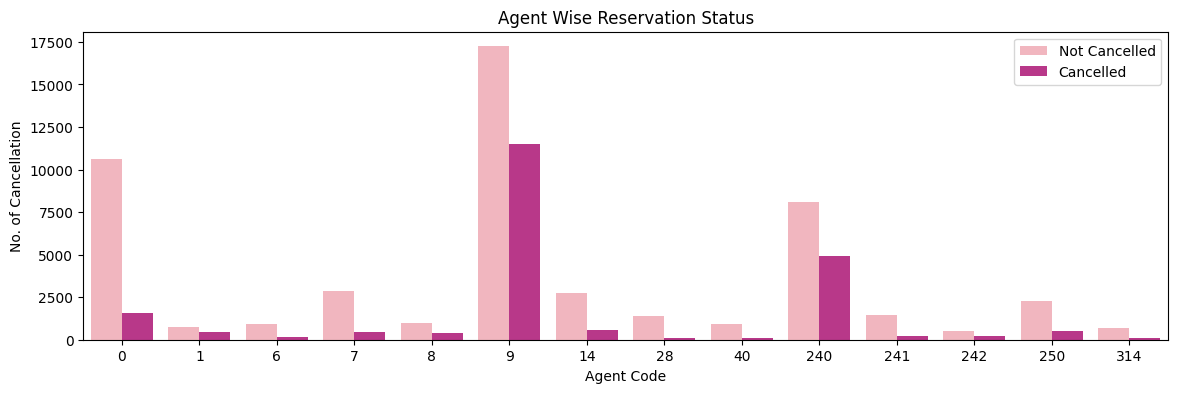

In [55]:
# Chart - 5 Agent Wise Reservation Status
# it groups the data by each unique combination of 'agent' and 'is_canceled' values.
# The .size() function counts the number of rows in each group formed by the groupby operation. Essentially, it calculates how many entries there are
# for each unique combination of agent and is_canceled. Reset index will  re-index the entire data frame on new column count
cancel_counts = dt.groupby(['agent', 'is_canceled']).size().reset_index(name='count')

# Sort the counts in descending order
cancel_counts_sorted = cancel_counts.sort_values(by='count', ascending=False)

# Select the first 20 rows
top_20_cancel_counts = cancel_counts_sorted.head(20)

# Now, you can use the 'top_20_cancel_counts' for plotting
plt.figure(figsize=(14,4))
# In this plot agent code will be mapped in source data frame dt and newly created top 20 agent data frame top_20_cancel_counts and only matched
# records will be considered
sns.countplot(x='agent', hue='is_canceled', data=dt.loc[dt['agent'].isin(top_20_cancel_counts['agent'])], palette='RdPu')
plt.title('Agent Wise Reservation Status')
plt.xlabel('Agent Code')
plt.ylabel('No. of Cancellation')
plt.legend(['Not Cancelled' , 'Cancelled'])

##### 1. Why did you pick the specific chart?

After getting overall picture about cancellation, there is a need to do further dip diving and perform analysis with respect to other attributes. Agent is one of the attribute which can be a cause of higher cancellation because evey Agent has his own performance and there is a need to review ?Agent performance

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is clearly seen that Agent code 9 and 240 has very high more than 60% of cancellation ratio, which is definitely an area of concern and need further analysis

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Negative performane of few Agent can have impact on overall achievement and revenue of an organization

## Chart - 6 - Customer Type Wise Reservation Status

In [56]:
# Chart - 6 Customer Type Wise Reservation Status
dt.groupby(['customer_type' , 'is_canceled']).agg({'is_canceled':'count'})

is_canceled
customer_type   is_canceled             
Contract        0                   2627
                1                    512
Group           0                    490
                1                     54
Transient       0                  50314
                1                  21672
Transient-Party 0                   9940
                1                   1787

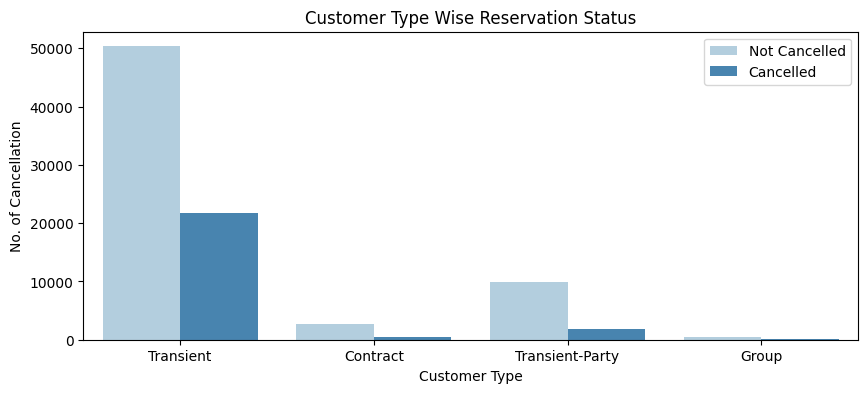

In [57]:
plt.figure(figsize=(10,4))
sns.countplot(x='customer_type', hue='is_canceled', data=dt, palette='Blues')
plt.title('Customer Type Wise Reservation Status')
plt.xlabel('Customer Type')
plt.ylabel('No. of Cancellation')
plt.legend(['Not Cancelled' , 'Cancelled'])

##### 1. Why did you pick the specific chart?

After getting overall picture about cancellation, there is a need to do further dip diving and perform analysis with respect to other attributes. Customer Type is one of the attribute which can be a cause of higher cancellation

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is clearly seen that Customer Type Transient has the highest percentage of cancellation as compared to other Customer Type

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customer Type Transient can have an impact on company's perfomance as it is contributing to higher number of cancellation. These are the customer which can have short stay and not repeat customer. More insight can be find by combination of this type of customer with other attributes where we have some findings.

## Chart - 7 - Country Wise Reservation Status

In [58]:
# Chart - 7 Country Wise Reservation Status
dt.groupby(['country', 'is_canceled']).agg(count=('is_canceled', 'count')).sort_values(by='count', ascending=False).head(20)

count
country is_canceled       
PRT     0            17662
        1             9791
GBR     0             8448
FRA     0             7104
ESP     0             5390
DEU     0             4334
IRL     0             2348
ITA     0             1991
GBR     1             1985
ESP     1             1862
FRA     1             1733
BEL     0             1670
NLD     0             1561
USA     0             1416
BRA     0             1268
CHE     0             1186
ITA     1             1075
DEU     1             1053
CN      0              868
AUT     0              777

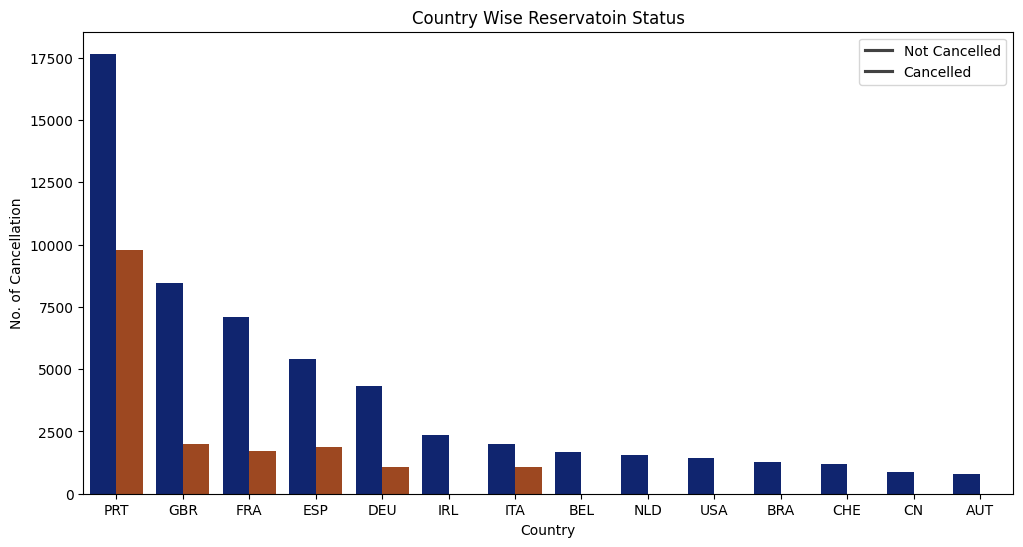

In [59]:
grouped = dt.groupby(['country', 'is_canceled']).agg(count=('is_canceled', 'count')).sort_values(by='count', ascending=False).head(20)

# Reset the index to turn MultiIndex into columns
grouped_reset = grouped.reset_index()

# Plot the count of cancellations (this is effectively a bar plot)
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', hue='is_canceled', data=grouped_reset, palette='dark')
plt.title('Country Wise Reservatoin Status')
plt.xlabel('Country')
plt.ylabel('No. of Cancellation')
plt.legend(['Not Cancelled' , 'Cancelled'])

##### 1. Why did you pick the specific chart?

After getting overall picture about cancellation, there is a need to do further dip diving and perform analysis with respect to other attributes. Country is one of the important attribute to understand customer behaviour and likings which can be a cause of higher cancellation

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is clearly seen that Customer of Portugal & Italy country has the highest percentage of cancellation as compared to other country

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customer of Portugal & Italy country can create high impact on company's perfomance as it is contributing to higher number of cancellation. Canellation ratio is more then 50% which is extremely high. We can straightway focus on these  countries customer. There is a deep analysis required to understand what customer demands and how can those demand be fulfilled.

## Chart - 8 - Arrival Month Wise Reservation Status

In [60]:
# Chart - 8 Arrival Month Wise Reservation Status
dt.groupby(['arrival_date_month' , 'is_canceled']).agg({'is_canceled':'count'})

is_canceled
arrival_date_month is_canceled             
April              0                   5499
                   1                   2409
August             0                   7634
                   1                   3623
December           0                   3753
                   1                   1378
February           0                   4683
                   1                   1415
January            0                   3655
                   1                   1038
July               0                   6859
                   1                   3198
June               0                   5411
                   1                   2354
March              0                   5683
                   1                   1830
May                0                   5913
                   1                   2442
November           0                   3941
                   1                   1054
October            0                   5292
                   1                   1642
September          0                   5048
                   1                   1642

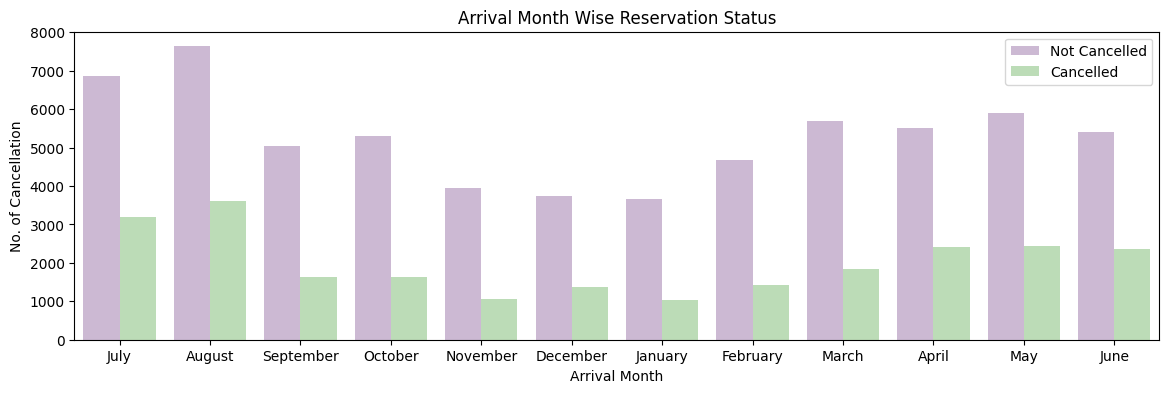

In [61]:
plt.figure(figsize=(14,4))
sns.countplot(x='arrival_date_month' , hue='is_canceled', data=dt, palette='PRGn')
plt.title('Arrival Month Wise Reservation Status')
plt.xlabel('Arrival Month')
plt.ylabel('No. of Cancellation')
plt.legend(['Not Cancelled' , 'Cancelled'])

##### 1. Why did you pick the specific chart?

After getting overall picture about cancellation, there is a need to do further dip diving and perform analysis with respect to other attributes. Arrival month is one of the attribute to understand customer cancellation

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is clearly seen that Customer arriving in Jul and August month has the highest calcellation ratio whereas November, December and January has the lowest cancellation. This coule be because the July and August are vacation months in these countries

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

## Chart - 9 - Histogram/Distribution Chart of ADR - Average Daily Revenue

Text(-3.6805555555555483, 0.5, 'Count')

<Figure size 1400x400 with 0 Axes>

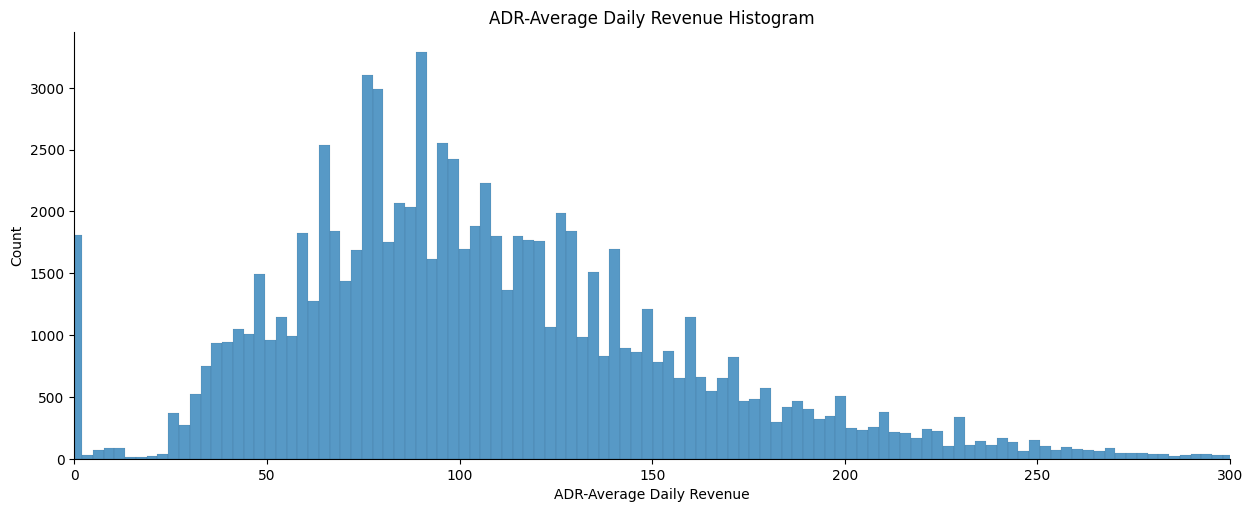

In [62]:
# Chart - 9 Histogram/Distribution Chart of ADR
plt.figure(figsize=(14,4))
#sns.displot(dt['adr'])
sns.displot(dt['adr'], height=5, aspect=2.5)
plt.xlim(0,300)
plt.title('ADR-Average Daily Revenue Histogram')
plt.xlabel('ADR-Average Daily Revenue')
plt.ylabel('Count')

Text(-8.055555555555548, 0.5, 'Count')

<Figure size 1400x400 with 0 Axes>

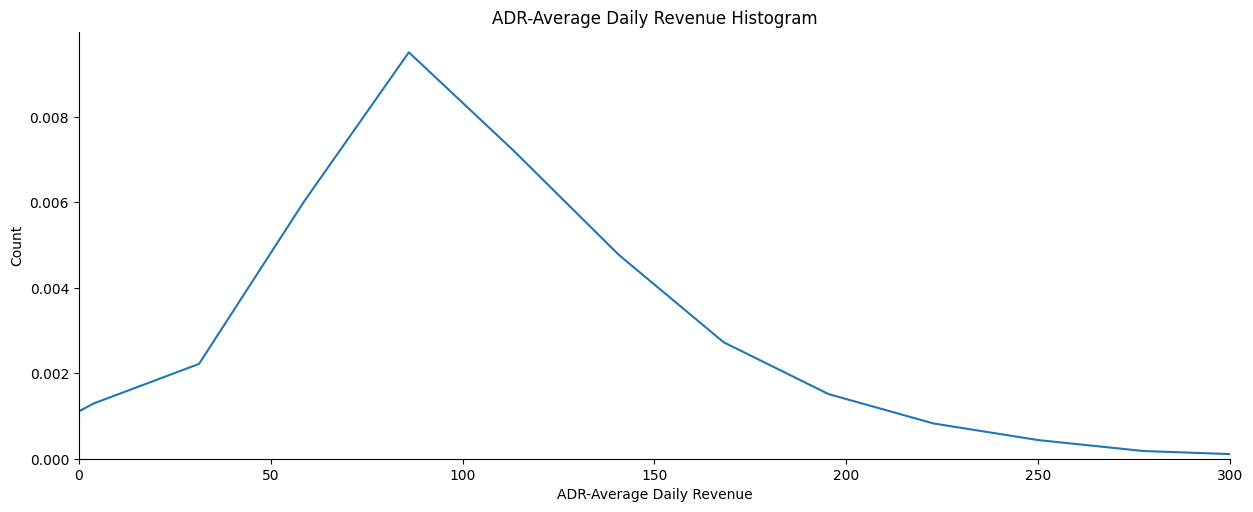

In [63]:
plt.figure(figsize=(14,4))
sns.displot(dt['adr'], kind='kde',height=5, aspect=2.5)
plt.xlim(0,300)
plt.title('ADR-Average Daily Revenue Histogram')
plt.xlabel('ADR-Average Daily Revenue')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

ADR-Average Daily Revenue is important attribute on customer reservation and cancellation. Higher ADR can lead to more cancellation as customer may not afford. We would like to see how ADR value is distributed from lower to higher range and which range contributes the maximum percentage

##### 2. What is/are the insight(s) found from the chart?

From the above two histogram and distribution graph it is observed that approx ADR value 80 has the highest count which means the ADR 80 is most affordable and suitable value for the customer.

Secondly maximum contribution is seen between 50-150 ADR value. As the ADR value is increasing the count is decreasing which can lead to more cancellation

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Higher ADR can lead to more cancellation due to affordability.

## Chart - 10 - Month Wise ADR-Average Daily Revenue

<ipython-input-64-d56b4a4bf21d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='arrival_date_month', y='adr', data=agg_data, palette='dark')


Text(0, 0.5, 'ADR-Average Daily Revenue')

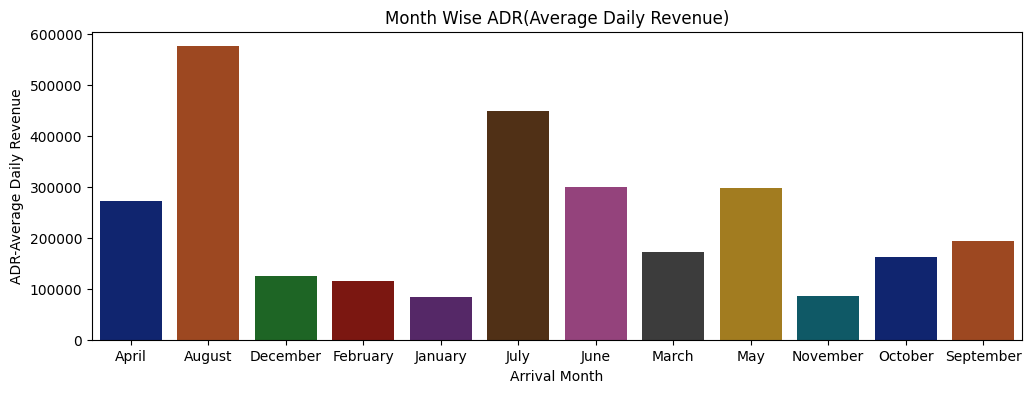

In [64]:
# Chart - 10 Month Wise ADR
plt.figure(figsize=(12,4))
agg_data = dt[dt['is_canceled'] == 1].groupby('arrival_date_month')['adr'].sum().reset_index()
sns.barplot(x='arrival_date_month', y='adr', data=agg_data, palette='dark')
plt.title('Month Wise ADR(Average Daily Revenue)')
plt.xlabel('Arrival Month')
plt.ylabel('ADR-Average Daily Revenue')

Text(0.5, 1.0, 'Total ADR by Arrival Month for Cancelled Reservations')

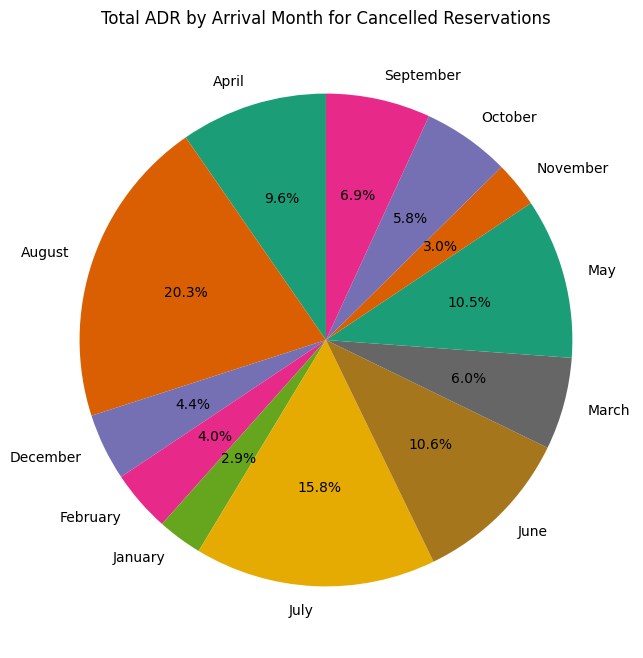

In [65]:
plt.figure(figsize=(8, 8))
plt.pie(agg_data['adr'], labels=agg_data['arrival_date_month'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Dark2.colors)
plt.title('Total ADR by Arrival Month for Cancelled Reservations')

##### 1. Why did you pick the specific chart?

We have already performed analysis on month wise cancellation and it has been observed that few months shows high cancellation and few months have low cancellation rate. There is a need to analysis it further with regards to ADR, whether high ADR contributing to higher cancellation or now

##### 2. What is/are the insight(s) found from the chart?

In our previous analysis of month wise cancellation, we have observed that higher cancellation rates are there for July and August and lower cancellation rate are seen for November, December, January, February. After perfoming month wise ADR, it is clearly seen that July and August shows higher ADR and November, December, January, February shows low ADR.

We can consider that customer may cancel booking due to higher room rate in Jul and August. In these countries normally Jul and August is a vacation period with good weather condition so people go on vacation in these two months and thats the reason most of the hotels have higher rates during this period.

November, December, January and February have very cold wather which is not suitable for tour and vacation hence there is a low ADR and have low cancellation rate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Cancellation rate is significantly high in Jul and August due to high ADR. Company can focus on how to attract customer and retain them during this period. They may provide some bundle package or some more services which can be included in their booking like free breakfast, free airport pick-up and drop, low rate taxi services, bigger room size etc.

## Chart - 11 - Country Wise ADR - Average Daily Revenue

<ipython-input-66-b74f2dba79f2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='adr', data=agg_data, palette='dark')


Text(0, 0.5, 'ADR-Average Daily Revenue')

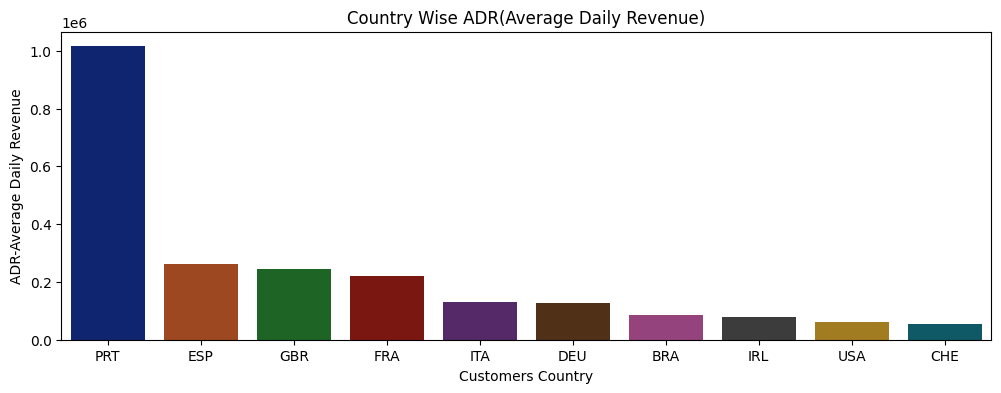

In [66]:
# Chart - 11 Country Wise ADR
plt.figure(figsize=(12,4))
agg_data = dt[dt['is_canceled'] == 1].groupby('country')['adr'].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='country', y='adr', data=agg_data, palette='dark')
plt.title('Country Wise ADR(Average Daily Revenue)')
plt.xlabel('Customers Country')
plt.ylabel('ADR-Average Daily Revenue')

Text(0.5, 1.0, 'Total ADR by Country for Cancelled Reservations')

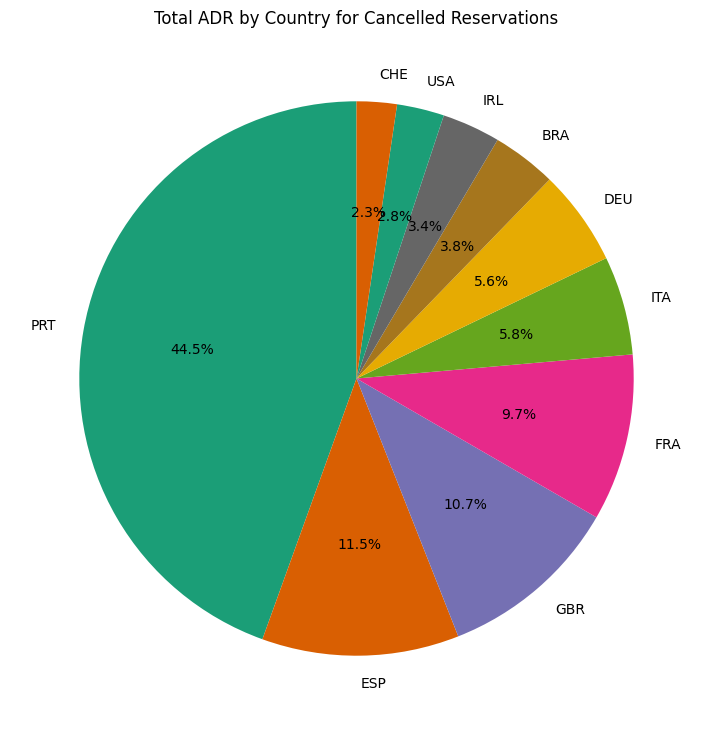

In [67]:
plt.figure(figsize=(9, 9))
plt.pie(agg_data['adr'], labels=agg_data['country'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Dark2.colors)
plt.title('Total ADR by Country for Cancelled Reservations')

##### 1. Why did you pick the specific chart?

We have already performed analysis on country wise cancellation and it has been observed that few countries shows high cancellation and few countries have low cancellation rate. There is a need to analysis it further with regards to ADR, whether high ADR contributing to higher cancellation or now

##### 2. What is/are the insight(s) found from the chart?

In our previous analysis of country wise cancellation, we have observed that higher cancellation rates are there for PRT(Portugal) and ITA(Itly). After perfoming country wise ADR, it is clearly seen that PRT(Portugal) shows higher ADR value which may be the primary reason for significant high cancellation rate.

Company can focus on how to attract customer and retain them with this ADR value. They may provide some bundle package or some more services which can be included in their booking like free breakfast, free airport pick-up and drop, low rate taxi services, bigger room size etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Higher ADR can have negative impact on company's revenue.

## Chart - 12 - Cancellation of Country PRT(Portugal) with regards to Agent Code 9 and 240

In [68]:
country_PRT_cancel=dt[(dt['country'] == 'PRT') & (dt['is_canceled'] == 1) ]

In [68]:
country_PRT_cancel.shape

(9791, 31)

In [69]:
country_agent=dt[(dt['country'] == 'PRT') & (dt['is_canceled'] == 1) & ((dt['agent'] == 9) | (dt['agent'] == 240))]

In [70]:
country_agent.shape

(3167, 31)

In [70]:
country_agent.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'No. of Cancellation')

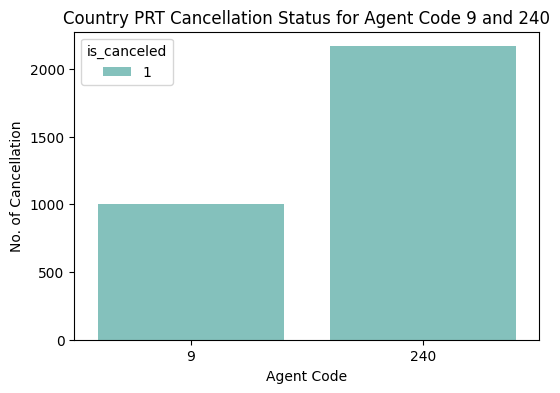

In [71]:
plt.figure(figsize=(6,4))
sns.countplot(x='agent' , hue='is_canceled', data=country_agent, palette='GnBu')
plt.title('Country PRT Cancellation Status for Agent Code 9 and 240')
plt.xlabel('Agent Code')
plt.ylabel('No. of Cancellation')


##### 1. Why did you pick the specific chart?

In our earlier analysis in chart - 5 for agent wise cancellation, there was a findings that agent code 9 and 240 having maximum contribution towards cancellation. We have also seen highest cancellation for PRT-Portugal country. We want to do combine analysis of these two attributes and would like to see whether these two agent have created any impact on cancellation of  PRT-Portugal country.

##### 2. What is/are the insight(s) found from the chart?

We have determined that there have been 9791 cancellations in the PRT-Portugal nation overall, and that these two agents have contributed 3167 cancellations out of this total which is 32%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These two agent has very high 32% of contribution in cancellation of booking for Portugal country and definitely it has negative impact on country's revenue and growth

## Chart - 13

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## Chart - 15 - Correlation Heatmap

In [72]:
# Correlation Heatmap visualization code
canceled_data = dt[['is_canceled', 'lead_time', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
                    'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                    'days_in_waiting_list', 'adr']].corr()
canceled_data_corr = canceled_data.corr()
canceled_data_corr

is_canceled  lead_time  \
is_canceled                        1.000000   0.203676   
lead_time                          0.203676   1.000000   
arrival_date_day_of_month         -0.113941  -0.164386   
stays_in_weekend_nights           -0.003592   0.363918   
stays_in_week_nights               0.021759   0.457579   
adults                             0.080296   0.132202   
children                           0.013011  -0.150464   
babies                            -0.187306  -0.188590   
previous_cancellations            -0.078954  -0.239326   
previous_bookings_not_canceled    -0.230276  -0.355289   
booking_changes                   -0.333943  -0.022639   
days_in_waiting_list              -0.107177   0.096549   
adr                                0.121085  -0.134086   

                                arrival_date_day_of_month  \
is_canceled                                     -0.113941   
lead_time                                       -0.164386   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.197155   
stays_in_week_nights                            -0.225058   
adults                                          -0.119884   
children                                        -0.083719   
babies                                          -0.095424   
previous_cancellations                          -0.119095   
previous_bookings_not_canceled                  -0.072108   
booking_changes                                 -0.090752   
days_in_waiting_list                            -0.073444   
adr                                             -0.087321   

                                stays_in_weekend_nights  stays_in_week_nights  \
is_canceled                                   -0.003592              0.021759   
lead_time                                      0.363918              0.457579   
arrival_date_day_of_month                     -0.197155             -0.225058   
stays_in_weekend_nights                        1.000000              0.816203   
stays_in_week_nights                           0.816203              1.000000   
adults                                         0.063038              0.067156   
children                                      -0.118516             -0.128045   
babies                                        -0.125969             -0.136263   
previous_cancellations                        -0.250979             -0.266232   
previous_bookings_not_canceled                -0.291912             -0.314129   
booking_changes                               -0.023768              0.013638   
days_in_waiting_list                          -0.189105             -0.146091   
adr                                           -0.091656             -0.089026   

                                  adults  children    babies  \
is_canceled                     0.080296  0.013011 -0.187306   
lead_time                       0.132202 -0.150464 -0.188590   
arrival_date_day_of_month      -0.119884 -0.083719 -0.095424   
stays_in_weekend_nights         0.063038 -0.118516 -0.125969   
stays_in_week_nights            0.067156 -0.128045 -0.136263   
adults                          1.000000 -0.023434 -0.095214   
children                       -0.023434  1.000000 -0.090761   
babies                         -0.095214 -0.090761  1.000000   
previous_cancellations         -0.287863 -0.215280 -0.133094   
previous_bookings_not_canceled -0.392049 -0.203429 -0.101062   
booking_changes                -0.228577 -0.081996  0.066349   
days_in_waiting_list           -0.152157 -0.181096 -0.114239   
adr                             0.360486  0.498494 -0.094971   

                                previous_cancellations  \
is_canceled                                  -0.078954   
lead_time                                    -0.239326   
arrival_date_day_of_month                    -0.119095   
stays_in_weekend_nights                      -0.250979   
stays_in_week_nights                      

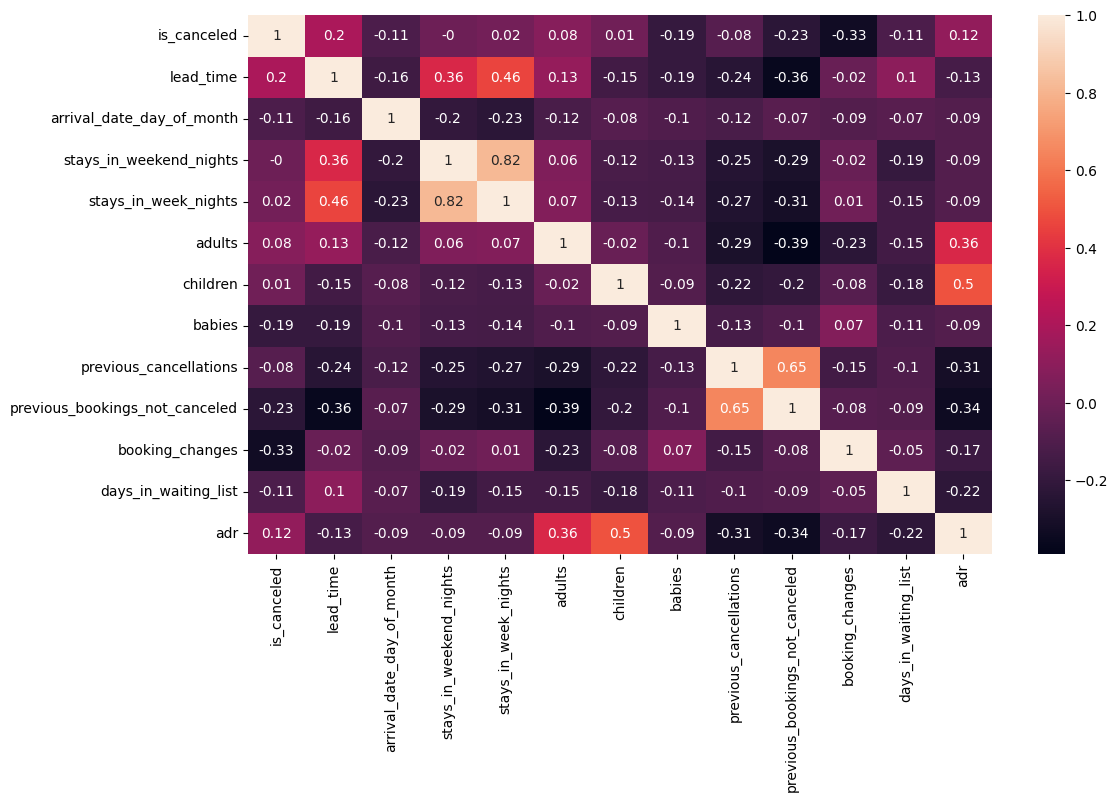

In [73]:
cor = canceled_data.corr()
plt.figure(figsize=(12,7))
plot=sns.heatmap((cor).round(2), annot=True)

##### 1. Why did you pick the specific chart?

We wanted to see the co-relation among different attributes with regards to cancellation of booking to find out some insight. Want to understand if any one attributes is affecting to other or not. Some of important attributes are selected to plot this graph.

##### 2. What is/are the insight(s) found from the chart?

We could find two attributes (1) stay in week-end nights and (2) stay in week nights have high corelation with cancellation. In a samiliar way we can see two more attributes (3) Previous booking cancelled and (2) Previous booking not cancelled have certaon level of correlation with cancellation of booking. Customer might have tendency of frequent cancellation of booking than it can be corelted here.

#### Chart - 16 - Pair Plot

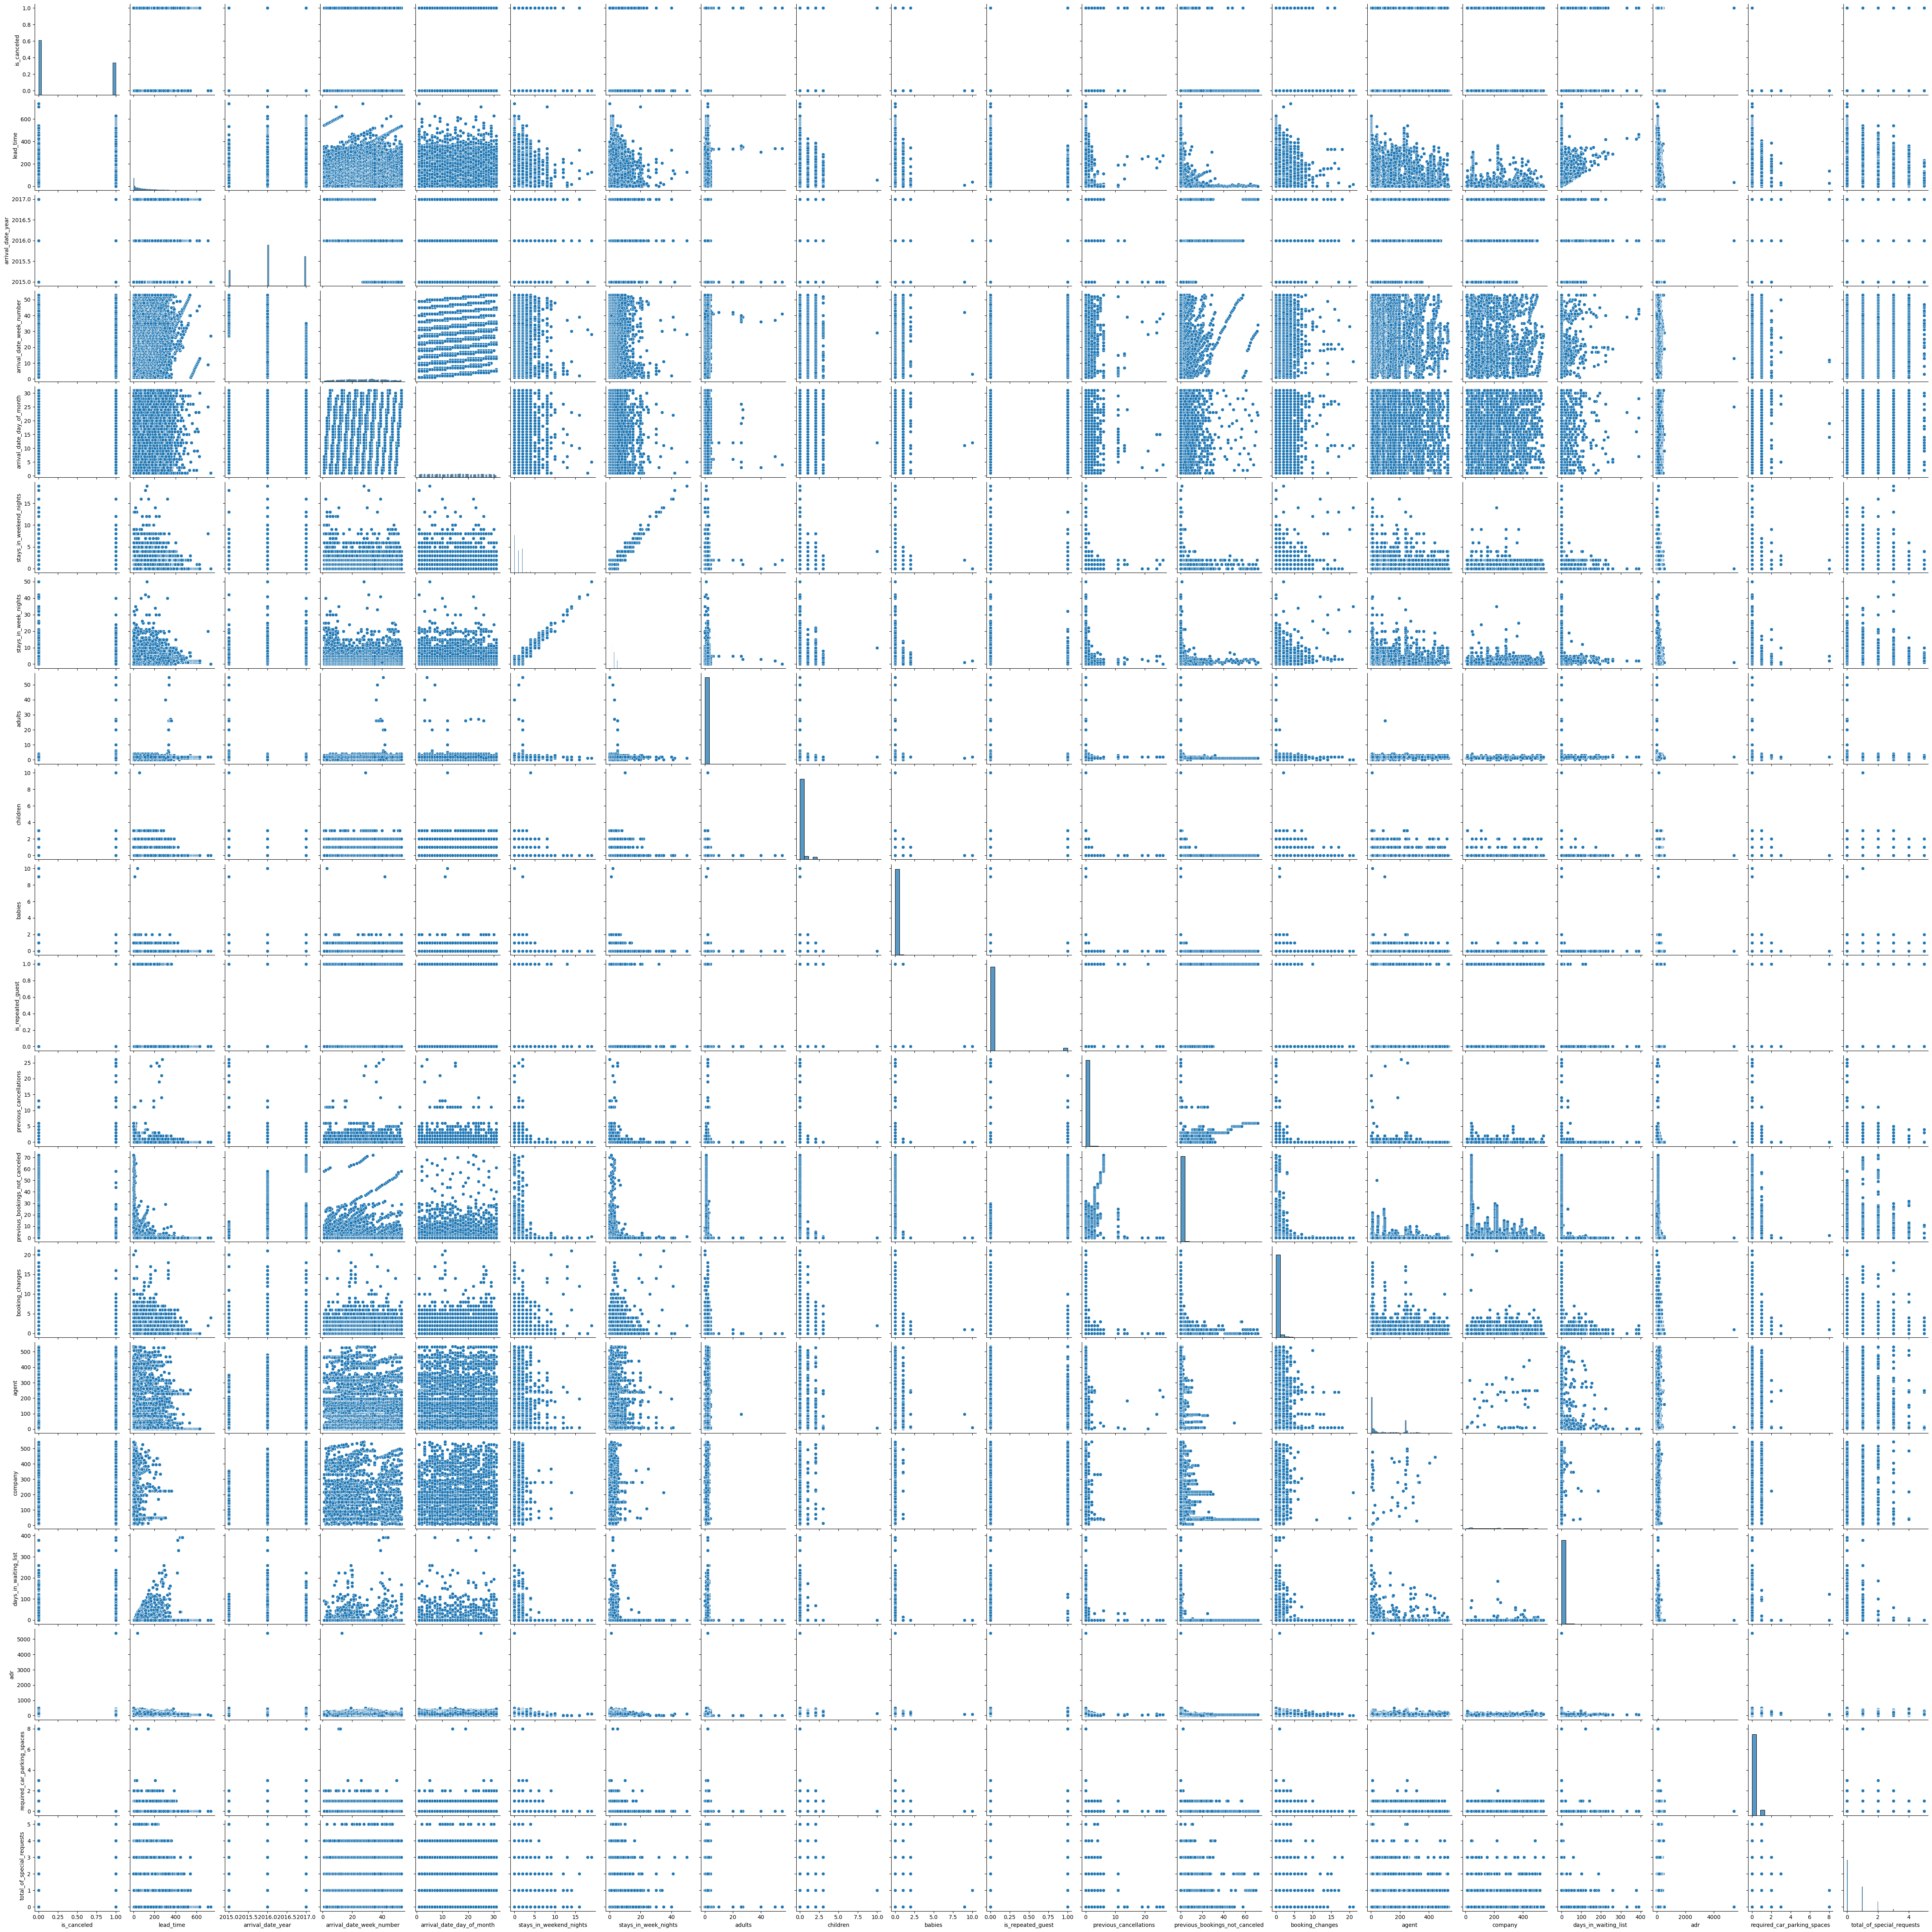

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?


As a summary we have observed that city hotel has high cancellation rate.

Customer those have booked thru online Travel Agent channel have higher cancellation and specially in Jul and August month.

July and Ausgust is a vacation period hence normally hotels has higher room tariff during thid period.

Other observation is that high ADR is seen for PRT-Porgual country which requires special attention for this country's booking.

Company can focus on how to attract customer and retain them with this ADR value. They may provide some bundle package or some more additional services which can be included in their booking like free breakfast, free airport pick-up and drop, low rate taxi services, bigger room size etc.

Now a days most of the online Travel Agent provide facility of free cancellation till last day hence customer may do multiple bookings specially in vacation period of Jul and August.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***